Text(0.5, 0, 'c')

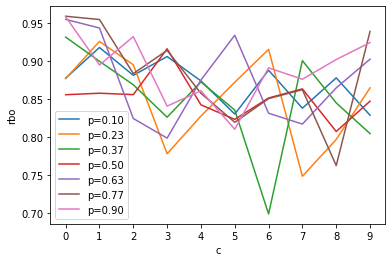

In [6]:
from ucb import UCB
from JudgingSimulator import JudgingSimulator

import numpy as np
import matplotlib.pyplot as plt

true_q = np.linspace(0.05, 0.95, 15)
n_judges = 5
opinion_var = 0.001
eval_var = 0.001
sim = JudgingSimulator(true_q, n_judges, opinion_var, eval_var) 


cs = np.arange(10)
scores = np.empty(len(cs))

for p in np.linspace(0.1, 0.9, 7):
    for i, c in enumerate(cs):
        rbo = UCB(sim, c).run_experiment(n_episodes=10, top_n=5).rbo(p=0.5).mean()
        scores[i] = rbo
    plt.plot(cs, scores, label=f'p={p:.2f}')

plt.legend()
plt.xticks(cs)
plt.ylabel('rbo')
plt.xlabel('c')